# Communication Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

## Insights and Visualization

### Insight 1: 

In [2]:
data = list(df.p1) + list(df.p2) + list(df.p3)
columns=['all_predict']
df_all_p = pd.DataFrame(data=data, columns=columns)

# Value counts to build a histogram.
all_p_count = df_all_p.all_predict.value_counts().head(20)

* This is the top 20 truly predicted breeds in the image predictor algorithms p1, p2 and p3 by count

In [3]:
all_p_count

labrador_retriever           246
golden_retriever             239
chihuahua                    171
pembroke                     135
cardigan                     110
toy_poodle                   100
pomeranian                    98
french_bulldog                89
pug                           88
chow                          86
chesapeake_bay_retriever      83
eskimo_dog                    78
cocker_spaniel                78
beagle                        73
siberian_husky                71
staffordshire_bullterrier     64
kuvasz                        64
pekinese                      63
malamute                      62
samoyed                       59
Name: all_predict, dtype: int64

### Visualization #1

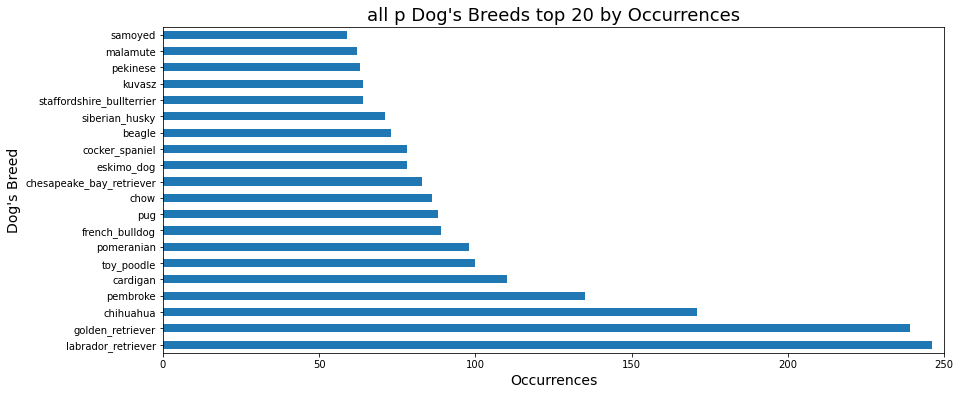

In [4]:
# Function to plot a barchart.
def barchart(df, title, xlabel, ylabel, x_range, font = 14, font_title = 18):
    # Plotting only the breed's dog with more than 20 occurencies.
    df[df > 20].plot(kind = 'barh',      # Set the kind of graphic.
                                 figsize = [14, 6]); # Graphic size.
    plt.title(label = title,         # Graphic Title.
              fontsize = font_title);   # Graphic title fontsize.
    plt.xlabel(xlabel = xlabel,         # X axis label
               fontsize = font);        # X axis fontsize
    plt.ylabel(ylabel = ylabel,         # Y axis label
               fontsize = font);        # Y axis fontsize
    plt.xlim(0, x_range)   

# Plotting the graphic.
barchart(all_p_count,
           title = 'all p Dog\'s Breeds top 20 by Occurrences',
           xlabel = 'Occurrences',
           ylabel = 'Dog\'s Breed',
        x_range = 250)

### Insight 2: 

* We concluded that both likes and retweets records collected were strongly positively correlated independent variables.

### Visualization #2

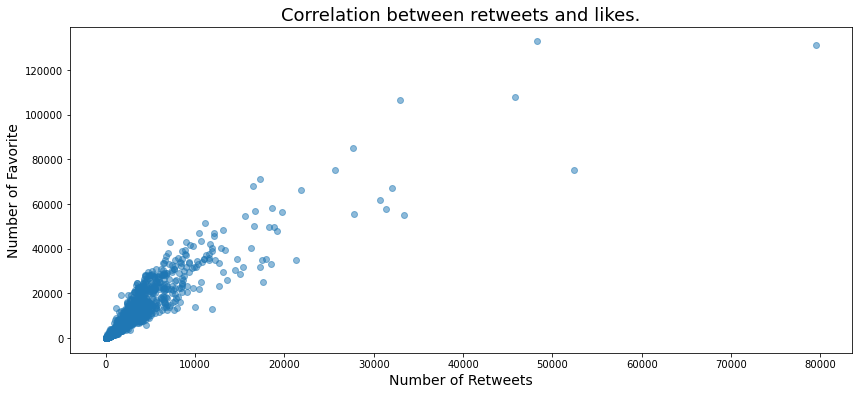

In [5]:
plt.figure(figsize= [14,6])
plt.scatter(x = df['retweet_count'],
            y = df['favorite_count'],
            alpha = 0.5)
plt.xlabel('Number of Retweets', fontsize = 14)
plt.ylabel('Number of Favorite', fontsize = 14)
plt.title('Correlation between retweets and likes.',
          fontsize = 18)
plt.show()

### Insight 3: 

* The average rating behavior on weekly average was 10.9 with a relatively small STD of 0.70. 
* However, the number of tweets were steadily declining between Mondays to Sundays in the range of ~ 320 - 235 tweets, which proves weekly seasonality and STD of 26.5.

### Visualization #3

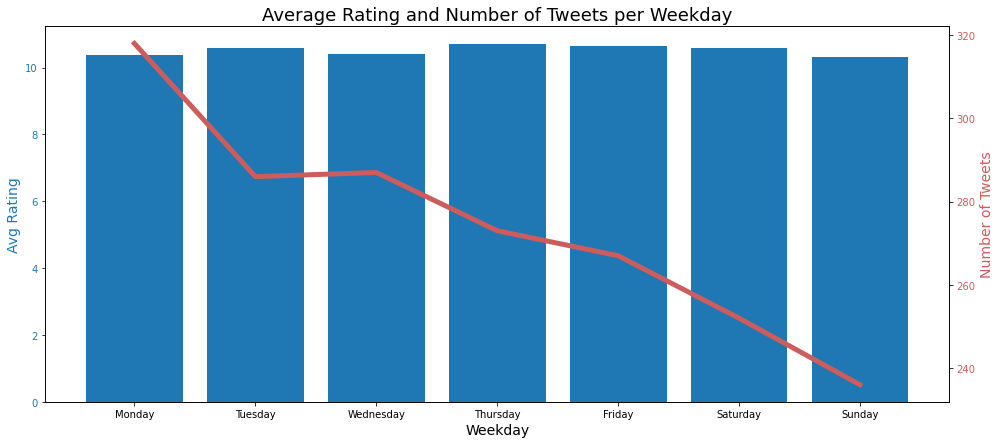

In [10]:
# converting `timestamp` dtype back to datetime64
df.timestamp = df.timestamp.apply(np.datetime64)

df_tw = df.copy()


df_tw['day_of_week'] = df_tw['timestamp'].dt.day_name()
df_tw['month'] = df_tw['timestamp'].dt.month_name()

# reset week
w = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df_w = df_tw.groupby('day_of_week').agg(
    tweets_count=('tweet_id', 'count'),
    retweet_sum=('retweet_count', 'sum'),
    favorite_sum=('favorite_count', 'sum'),
    avg_rating=('rating_numerator', 'mean')).reindex(labels=w)
df_w

# General configuration for all plots.
font = 14          # X and Y axis fontsize.
font_title = 18    # Graphic's Title fontsize.
transparency = 0.5 # Transparency in cases of scatter plot.
width = 0.7        # Bar width

# Graphic Settings.
fig, ax1 = plt.subplots(figsize = [14,6])

# First Element: Blue bars.
color = 'tab:blue'
ax1.set_xlabel('Weekday', fontsize = font)
ax1.set_ylabel('Avg Rating', color = color, fontsize = font)
ax1.bar(df_w.index, df_w['avg_rating'], color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

# Second Element: Red line.
ax2 = ax1.twinx()  # share axis with ax1 element.
color = 'indianred'
ax2.set_ylabel('Number of Tweets', color = color, fontsize = font)  # we already handled the x-label with ax1
ax2.plot(df_w.index, df_w['tweets_count'], color = color, linewidth = 5)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Rating and Number of Tweets per Weekday',                # Graphic title.
          fontsize = font_title)   # Graphic font title.
plt.show()

In [11]:
df_w

,tweets_count,retweet_sum,favorite_sum,avg_rating
day_of_week,,,,
Monday,318,802713.0,2621742.0,10.364780
Tuesday,286,737289.0,2493569.0,10.576923
Wednesday,287,717125.0,2455358.0,10.414634
Thursday,273,641465.0,2153590.0,10.695971
Friday,267,620610.0,2088959.0,10.640449
Saturday,252,735574.0,2225295.0,10.575397
Sunday,236,532022.0,1803616.0,10.309322


In [12]:
df_w.describe()

,tweets_count,retweet_sum,favorite_sum,avg_rating
count,7.000000,7.000000,7.000000e+00,7.000000
mean,274.142857,683828.285714,2.263161e+06,10.511068
std,26.541970,90934.281581,2.809435e+05,0.147651
min,236.000000,532022.000000,1.803616e+06,10.309322
25%,259.500000,631037.500000,2.121274e+06,10.389707
50%,273.000000,717125.000000,2.225295e+06,10.575397
75%,286.500000,736431.500000,2.474464e+06,10.608686
max,318.000000,802713.000000,2.621742e+06,10.695971


### Insight 4: 

* One monthly basis, however, the average rating trends, with a mean of 10.5, experienced more variation (STD = 0.7 monthly compared to 0.15 weekly) 4.5x more than that of weekly variation.
* The number of tweets were declining between January and October with slight rise between April and July and dramatic rise between October to year end, which proves monthly seasonality (mean = 160, std = 113).

### Visualization #4

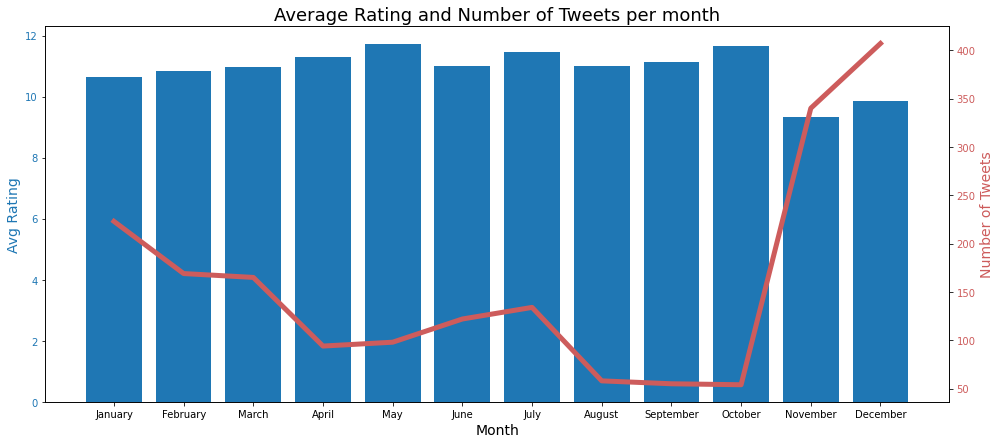

In [13]:
# reset month
m = ['January','February', 'March', 'April','May','June', 'July',
     'August', 'September','October','November','December']

df_m = df_tw.groupby('month').agg(
    tweets_count=('tweet_id', 'count'),
    retweet_sum=('retweet_count', 'sum'),
    favorite_sum=('favorite_count', 'sum'),
    avg_rating=('rating_numerator', 'mean')).reindex(labels=m)
df_m

# General configuration for all plots.
font = 14          # X and Y axis fontsize.
font_title = 18    # Graphic's Title fontsize.
transparency = 0.5 # Transparency in cases of scatter plot.
width = 0.7        # Bar width

# Graphic Settings.
fig, ax1 = plt.subplots(figsize = [14,6])

# First Element: Blue bars.
color = 'tab:blue'
ax1.set_xlabel('Month', fontsize = font)
ax1.set_ylabel('Avg Rating', color = color, fontsize = font)
ax1.bar(df_m.index, df_m['avg_rating'], color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

# Second Element: Red line.
ax2 = ax1.twinx()  # share axis with ax1 element.
color = 'indianred'
ax2.set_ylabel('Number of Tweets', color = color, fontsize = font)  # we already handled the x-label with ax1
ax2.plot(df_m.index, df_m['tweets_count'], color = color, linewidth = 5)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Rating and Number of Tweets per month',                # Graphic title.
          fontsize = font_title)   # Graphic font title.
plt.show()

In [14]:
df_m

,tweets_count,retweet_sum,favorite_sum,avg_rating
month,,,,
January,223,535265.0,1626863.0,10.654709
February,169,402209.0,1487683.0,10.852071
March,165,391667.0,1452731.0,10.981818
April,94,317971.0,1175988.0,11.297872
May,98,404105.0,1452020.0,11.714286
June,122,577504.0,1957158.0,10.991803
July,134,525983.0,2077240.0,11.455224
August,58,208152.0,607052.0,11.017241
September,55,188082.0,581028.0,11.127273


In [16]:
df_m.describe()

,tweets_count,retweet_sum,favorite_sum,avg_rating
count,12.000000,12.000000,1.200000e+01,12.000000
mean,159.916667,398899.833333,1.320177e+06,10.911175
std,113.003989,155611.064522,5.221490e+05,0.703857
min,54.000000,188082.000000,5.810280e+05,9.317647
25%,85.000000,290516.250000,8.956520e+05,10.802730
50%,128.000000,396938.000000,1.452376e+06,11.004522
75%,182.500000,528303.500000,1.668748e+06,11.337210
max,407.000000,670581.000000,2.077240e+06,11.714286


## Conclusion

1. labrador_retriever and golden_retriever are the top two predicted dog breeds
2. There is (as expected) a strong positive correlation between likes and retweets
3. There is a proof to weekly and monthly seasonality towards ratings and notably the number of tweets.